# Predicting GHG emissions using Neural Networks

Climate change is a real global concern in our times.  
One of the most relevant metrics for this problem is the amount of Green House Effect Gases (expressed as tons of Carbon Dioxide, or CO2).
Energy use by human activities can be correlated to the production of Green House Effect Gases (GHG).  
Usually big and old buildings will have a bigger impact on GHG than modern, smaller and energy efficient ones. 
Data science will always try to answer a question (or prove a hypothesis if you want to be technical), 
and this is what can be considered "Business understanding".  
So the question can be: Can we use machine learning to predict the amount of GHG produced by buildings greater than 25K square feet? 

To answer this, we will be using the data set: 'Energy and Water Data Disclosure for Local Law 84 2020 (Data for Calendar Year 2019)', from Mayor's Office of Sustainability (MOS) of New York City, and available from NYC Open Data at https://data.cityofnewyork.us/Environment/Energy-and-Water-Data-Disclosure-for-Local-Law-84-/28fi-3us3.

## Contents :
    1- Process the dataset
    2- Create an initial deep neural network
    3- Train the DNN
    4- Test the DNN
    5- Create a second DNN
    6- Train and test the sDNN
    7- Compare the results from both DNN's to another ML algorithm (random forest)

### Importing needed modules

For Deep Learning, Keras and Tensorflow will be used.  Pandas and numpy to work with arrays and dataframes.  
Sklearn for Random Forest and metrics.  Lastly matplotlib and seaborn for graphics.

In [1]:
import tensorflow as tf
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error 
from matplotlib import pyplot as plt
import seaborn as sb
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler


/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:520: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:521: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/jupyterlab/conda/envs/python/lib/python3

## 1. Processing the Data set.

A reduced csv file was produced from the original data set, using Excel.   
Mainly all null values were eliminated.  All the columns with non relevant information were also removed.  
Variable City Building was binary coded.  Date of Build was converted to 'years' (2019-DoB); and DoB used was <= 2018.  
Total GHG Emissions was renamed target. 

From the original 68 columns and 28K rows, the cleaned data set has 11 columns (1 categorical, 9 numerical and target), and 16.8k rows.

In [2]:
# !wget -O Energy_and_Water_Data_Reduced_.csv https://github.com/rarriagao/Coursera_capstone/blob/master/Energy_and_Water_Data_Reduced_.csv

In [3]:
# load cleaned dataset
df1 = pd.read_csv("Energy_and_Water_Data_Reduced_.csv")

In [4]:
df1.describe()


,cityBuilding,area,years,num_Buildings,occupancy,site_EUI,wn_Site_n_Gas_Use,wn_Site_Electricity,water_Use,target
count,16849.000000,1.684900e+04,16849.000000,16849.000000,16849.000000,16849.000000,1.684900e+04,1.684900e+04,1.684900e+04,16849.000000
mean,0.077097,1.078115e+05,71.273073,1.202445,98.660751,92.942596,5.682541e+04,9.482743e+05,1.582545e+05,712.502843
std,0.266753,1.988004e+05,32.946144,3.163821,6.808084,197.914407,2.775482e+05,3.512209e+06,1.889824e+07,5660.219681
min,0.000000,2.500000e+03,1.000000,0.000000,0.000000,0.500000,0.000000e+00,4.200000e+02,0.000000e+00,1.600000
25%,0.000000,3.994700e+04,53.000000,1.000000,100.000000,67.100000,1.074310e+04,1.906109e+05,1.842900e+03,214.300000
50%,0.000000,6.179800e+04,83.000000,1.000000,100.000000,84.400000,3.201040e+04,3.251359e+05,3.537500e+03,334.200000
75%,0.000000,1.079520e+05,94.000000,1.000000,100.000000,104.300000,5.468600e+04,6.960773e+05,6.332900e+03,568.700000
max,1.000000,8.942176e+06,626.000000,156.000000,100.000000,22222.400000,1.831619e+07,1.544950e+08,2.453004e+09,670083.200000


defining X and Y

In [5]:
y = df1['target']

In [6]:
X = df1.copy()

In [7]:
X.drop(['target'], axis=1, inplace=True)

Now define a function to get the categorical variable for later One Hot Encoding.

In [8]:
def get_cols(df,col_type):
    '''
    Arguments :
    df : The dataframe to process
    col_type : 
          
          no_num : to only get categorical columns
              
    '''
    if (col_type == 'no_num'):
        predictors = df.select_dtypes(include=['object'])
    
    else :
        print('Error : choose type (no_num)')
        return 0
    cols_cat = []
    for col in predictors.columns:
        if not df[col].isnull().any():
            cols_cat.append(col)
    return cols_cat

Getting our categorical column.

In [9]:
# getting type from X

cat_cols = get_cols(X, 'no_num')

Now, review some properties of the numerical features'

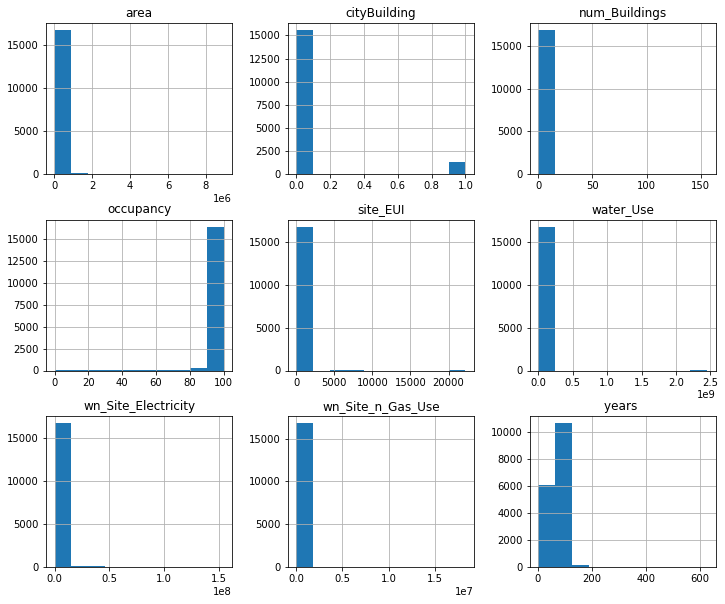

In [10]:
# plot some histograms of the data

X.hist(figsize = (12,10))
plt.show()

We can see there are outliers, but most of the data is very closely concentrated.

### Viewing data correlation

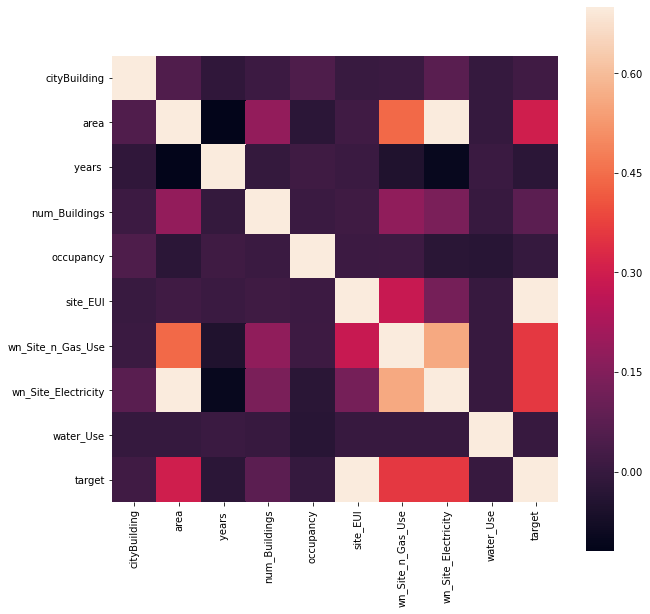

In [11]:
# Using the original data to plot a correlation heat map

colormap = df1.corr()
fig = plt.figure(figsize = (10,10))

sb.heatmap(colormap, vmax = .7, square = True)
plt.show()

As seen, Site Energy Use Intensity is highly correlated with GHG emissions (target).  
Gross area and weather normalized Electricity usage are also highly correlated between them.

### Create a function for One Hot Encoding

As type is a categorical variable refering to the use of the property, we need to encode it.

In [12]:
def oneHotEncode(df,colNames):
    for col in colNames:
        if( df[col].dtype == np.dtype('object')):
            dummies = pd.get_dummies(df[col],prefix=col)
            df = pd.concat([df,dummies],axis=1)

            #drop the encoded column
            df.drop([col],axis = 1 , inplace=True)
    return df

In [14]:
print('There were {} columns before encoding categorical features'.format(X.shape[1]))
Xext = oneHotEncode(X, cat_cols)
print('There are {} columns after encoding categorical features'.format(Xext.shape[1]))

There were 10 columns before encoding categorical features
There are 70 columns after encoding categorical features


In [15]:
Xext.head()

,cityBuilding,area,years,num_Buildings,occupancy,site_EUI,wn_Site_n_Gas_Use,wn_Site_Electricity,water_Use,type_0n-Refrigerated Warehouse,...,type_Strip Mall,type_Supermarket/Grocery Store,type_Transportation Terminal/Station,type_Urgent Care/Clinic/Other Outpatient,type_Veterinary Office,type_Vocational School,type_Wastewater Treatment Plant,type_Wholesale Club/Supercenter,type_Worship Facility,type_Zoo
0,0,3813938,50,5,100,247.4,9479229.3,95603180.0,285.3,0,...,0,0,0,0,0,0,0,0,0,0
1,0,308789,28,1,100,270.3,500210.8,9685688.9,24665.5,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1272119,52,1,90,105.1,6087.4,19883052.5,17994.7,0,...,0,0,0,0,0,0,0,0,0,0
3,0,885474,51,1,60,69.6,0.0,10320537.5,4235.5,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1852980,33,1,100,50.9,353751.0,16214482.6,21334.0,0,...,0,0,0,0,0,0,0,0,0,0


## 2- Create an initial deep neural network

Spliting the data between train and test sets (80 / 20)

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( Xext, y, test_size=0.2, random_state=8)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)


Train set: (13479, 70) (13479,)
Test set: (3370, 70) (3370,)


The initial NN will have three layers: input,middle,output.  
70 -> 70 -> 1

In [17]:
model1 = Sequential()

# input layer, with 70 neurons, the same as initial features
model1.add(Dense(70, kernel_initializer='normal',input_dim = X_train.shape[1], activation='relu'))

# layer 1 with 140 neurons, double the input
model1.add(Dense(140, kernel_initializer='normal',activation='relu'))

#output layer
model1.add(Dense(1, kernel_initializer='normal',activation='linear'))


Use Mean Absolute Error ('MAE') to measure the model.  
Optimizer = adam

In [19]:
model1.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 70)                4970      
_________________________________________________________________
dense_2 (Dense)              (None, 140)               9940      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 141       
Total params: 15,051
Trainable params: 15,051
Non-trainable params: 0
_________________________________________________________________


Create a checkpoint in order to later load best weights for the model

In [20]:
checkpoint_name = 'Weights-{epoch:03d}--{val_loss:.5f}.hdf5' 
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose = 1, save_best_only = True, mode ='auto')
callbacks_list = [checkpoint]

## 3- Train the DNN

In [21]:
model1.fit(X_train, y_train, epochs=50, batch_size=32, validation_split = 0.2, callbacks=callbacks_list)

Train on 10783 samples, validate on 2696 samples
Epoch 1/50
10783/10783 [==============================] - 7s 694us/step - loss: 793.7792 - mean_absolute_error: 793.7792 - val_loss: 363.4840 - val_mean_absolute_error: 363.4840

Epoch 00001: val_loss improved from inf to 363.48397, saving model to Weights-001--363.48397.hdf5
Epoch 2/50
10783/10783 [==============================] - 7s 645us/step - loss: 4342.8075 - mean_absolute_error: 4342.8075 - val_loss: 362.0230 - val_mean_absolute_error: 362.0230

Epoch 00002: val_loss improved from 363.48397 to 362.02299, saving model to Weights-002--362.02299.hdf5
Epoch 3/50
10783/10783 [==============================] - 6s 534us/step - loss: 1103.6983 - mean_absolute_error: 1103.6983 - val_loss: 126.2778 - val_mean_absolute_error: 126.2778

Epoch 00003: val_loss improved from 362.02299 to 126.27784, saving model to Weights-003--126.27784.hdf5
Epoch 4/50
10783/10783 [==============================] - 6s 559us/step - loss: 2556.1100 - mean_absolut

The best value for the model was 68.07584

In [22]:
# Load weights file of the best model :
weights_file = 'Weights-047--68.07584.hdf5' # choose the best checkpoint 
model1.load_weights(weights_file) # load it
model1.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])

## 4- Test the DNN

In [23]:
predict_model1 = model1.predict(X_test)

In [24]:
predict_model1

array([[ 352.01163],
       [ 322.73953],
       [ 348.5625 ],
       ...,
       [ 270.96872],
       [ 308.71228],
       [2431.8818 ]], dtype=float32)

## 5- Create a second DNN

We now define a second DNN with two additional layes, and normalizing the training and test data.

In [25]:
# normalizing training data

X_train= preprocessing.StandardScaler().fit(X_train).transform(X_train)

In [26]:
# normalizing test data

X_test= preprocessing.StandardScaler().fit(X_test).transform(X_test)

New layout:  70 -> 210 -> 210 -> 210 -> 1

In [27]:
model2 = Sequential()

# input layer, with 70 neurons, the same as initial features
model2.add(Dense(70, kernel_initializer='normal',input_dim = X_train.shape[1], activation='relu'))

# layer 1, 2 and 3 with 210 neurons, triple the input
model2.add(Dense(210, kernel_initializer='normal',activation='relu'))
model2.add(Dense(210, kernel_initializer='normal',activation='relu'))
model2.add(Dense(210, kernel_initializer='normal',activation='relu'))

#output layer
model2.add(Dense(1, kernel_initializer='normal',activation='linear'))


In [28]:
#Using MAE to evaluate model2

model2.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
model2.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 70)                4970      
_________________________________________________________________
dense_5 (Dense)              (None, 210)               14910     
_________________________________________________________________
dense_6 (Dense)              (None, 210)               44310     
_________________________________________________________________
dense_7 (Dense)              (None, 210)               44310     
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 211       
Total params: 108,711
Trainable params: 108,711
Non-trainable params: 0
_________________________________________________________________


Create a checkpoint in order to later load best weights for the model

In [29]:
checkpoint_name = 'Weights2-{epoch:03d}--{val_loss:.5f}.hdf5' 
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose = 1, save_best_only = True, mode ='auto')
callbacks_list = [checkpoint]

## 6- Train and test the sDNN

In [30]:
model2.fit(X_train, y_train, epochs=50, batch_size=32, validation_split = 0.2, callbacks=callbacks_list)

Train on 10783 samples, validate on 2696 samples
Epoch 1/50
10783/10783 [==============================] - 14s 1ms/step - loss: 323.6235 - mean_absolute_error: 323.6235 - val_loss: 152.4030 - val_mean_absolute_error: 152.4030

Epoch 00001: val_loss improved from inf to 152.40299, saving model to Weights2-001--152.40299.hdf5
Epoch 2/50
10783/10783 [==============================] - 12s 1ms/step - loss: 177.3923 - mean_absolute_error: 177.3923 - val_loss: 141.3937 - val_mean_absolute_error: 141.3937

Epoch 00002: val_loss improved from 152.40299 to 141.39368, saving model to Weights2-002--141.39368.hdf5
Epoch 3/50
10783/10783 [==============================] - 12s 1ms/step - loss: 164.4758 - mean_absolute_error: 164.4758 - val_loss: 133.8578 - val_mean_absolute_error: 133.85785s - loss: 217.9188 - mean_abs -

Epoch 00003: val_loss improved from 141.39368 to 133.85784, saving model to Weights2-003--133.85784.hdf5
Epoch 4/50
10783/10783 [==============================] - 13s 1ms/step - los

The best value is 115.02338.  This seems worst than in the first model, but the first one was trained with non normalized data, and it was seen that the most 'strong' variable was Site EUI, so it can be infered that with normalization the other variables have now more weight.

In [32]:
# Load weights file of the best model :
weights_file = 'Weights2-005--115.02338.hdf5' # choose the best checkpoint 
model2.load_weights(weights_file) # load it
model2.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])

In [33]:
predict_model2 = model2.predict(X_test)

In [34]:
predict_model2

array([[ 280.6603 ],
       [ 248.82431],
       [ 364.91562],
       ...,
       [ 187.71007],
       [ 127.5742 ],
       [2293.9592 ]], dtype=float32)

## 7- Compare the results from both DNN's to another ML algorithm (random forest)

Using the same normalized data

In [35]:
model3 = RandomForestRegressor()
model3.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [36]:
predict_model3 = model3.predict(X_test)
MAE = mean_absolute_error(y_test , predict_model3)
print('Random forest validation MAE = ', MAE)

Random forest validation MAE =  183.1571661721068


Now we calculate MAE for the first and second NN using the predicted values and the real values of the test set:

In [38]:
MAE1 = mean_absolute_error(y_test , predict_model1)
print('First NN = ', MAE1)
MAE2 = mean_absolute_error(y_test , predict_model2)
print('Second NN = ', MAE2)

First NN =  65.14283659643517
Second NN =  241.77107880697054


As expected, Random forest performed better at regression that a NN, although NN can still be fine tuned for better results.